<a href="https://colab.research.google.com/github/valengo/pandas-tutorial/blob/main/primeiros_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uma versão online de Notebook está disponível no Google Colaboratory para visualização e/ou cópia. Para acessar, [clique aqui](https://colab.research.google.com/drive/16zO5AZ5bymClUGc-5UqrNPwSnkyF8DNH?usp=sharing)!

Você pode também clonar esse repositório. 😁

Nesse tutorial vamos utilizar o dataset ["Amazon Top 50 Bestselling Books 2009-2019"](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019) que é Public Domain e pode ser baixado no site [kaggle](https://www.kaggle.com).

Para facilitar, eu hospedei os dados no repositório do GitHub para esse tutorial. Você pode, se quiser, baixá-lo clicando [aqui](https://raw.githubusercontent.com/valengo/pandas-tutorial/main/bestsellers-with-categories.csv). Esse arquivo tem 8 colunas delimitadas por vírgulas (formato csv).

[Pandas](https://pandas.pydata.org) é um pacote Python para manipulação e análise de dados. Após instalação, é preciso importar o pacote para utilizar em nossos *scripts*:

In [1]:
import pandas as pd

Ao importar estamos dando um apelido (pd) para a biblioteca, para que seja mais fácil referenciá-la no nosso código.

Pandas pode carregar dados de arquivos no seu computador ou até mesmo de links da internet. Nós vamos carregar os dados sobre os livros em uma variável chamada `table` a partir da [URL para o arquivo hospedado no GitHub](https://raw.githubusercontent.com/valengo/pandas-tutorial/main/bestsellers-with-categories.csv):

In [72]:
table = pd.read_csv('https://raw.githubusercontent.com/valengo/pandas-tutorial/main/bestsellers-with-categories.csv')

Nós podemos conferir as primeiras linhas da tabela com o método `head()`:

In [3]:
table.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


É muito importante verificarmos se existem dados inválidos em nossas colunas.
Um jeito é investigar a contagem de NAs por coluna.

No código abaixo, verificamos, por coluna, se os valores são NA com o método `isna()` e depois fazemos a soma por coluna com `sum()`.

In [4]:
table.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Como a contagem de NAs ficou em 0 para todas as colunas, significa que não temos NAs na nossa tabela.

Caso você tenha ficado em dúvida em como chegamos nessa contagem por coluna, exeplico: o que acontece basicamente é que o método `isna()` retorna uma tabela onde todos os valores são True or False em relação à pergunta "o valor é NA?". Ou seja, se determinado valor na tabela original é NA, na tabela resultante vamos observar True, senão False.

Podemos verificar as primeiras linhas de `isna()` com o método `head()`:

In [5]:
table.isna().head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


Finalmente, ao usarmos o método `sum()` no resultado do `isna()`, é retornada a contagem de valores verdadeiros (True). Isso funciona basicamente porque True é 1 e o False é 0.

Devemos explorar os dados sempre em busca de validar os que nos foi falado. Por exemplo, teoricamente as datas de quando os livros foram classificados como *bestsellers* estão no intervalo 2009 a 2019.

Para verificar as datas, vamos acessar os dados apenas na coluna 'Year' e usar o método `unique()` para gerar uma lista dos valores únicos:

In [7]:
sorted(table['Year'].unique())

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

A função `sorted()` foi utilizada para facilitar a visualização dos anos.
Perceba que para acessar uma coluna específica, utilizamos a *string* correspondente ao nome entre colchetes, nesse caso: `table['Year']`.

Uma outra forma de verificar a congruência dos dados é fazer um [histograma](https://pt.wikipedia.org/wiki/Histograma) com o método `hist()`:

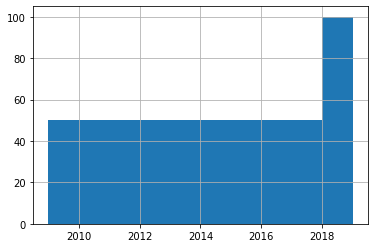

In [8]:
table['Year'].hist()

Até o momento nós realizamos operações na tabela como um todo e também em coluna específica (a do ano). Na [documentação do pacote pandas](https://pandas.pydata.org/docs/), as tabelas são referidas como [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) e as colunas como [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

Basicamente, um `DataFrame` possui duas dimensões (linhas e colunas) que podem ser nomeadas (nossas colunas têm nomes específicos: Name, Author, Year...).
Já a `Serie` tem apenas uma dimensão, é como se fosse uma lista!

Uma coisa a se ter em mente é que várias operações podem ser feitas no tabela como um tudo ou em colunas específicas.



---



Métricas de estatística descritiva podem ser calculadas facilmente, por exemplo a média e desvio padrão do número de avaliações (Reviews):

In [11]:
table['Reviews'].mean()

11953.281818181818

In [12]:
table['Reviews'].std()

11731.132017431895

Considerando que o desvio padrão é quase igual a média, podemos pensar que existem livros que receberam muito mais avaliações do que outros.
Podemos verificar isso computando o valor mínimo e máximo de avaliações:

In [13]:
table['Reviews'].min()

37

In [14]:
table['Reviews'].max()

87841

Ao invés de calcular todos esses valores um por vez, podemos computá-los todos ao mesmo tempo com o método `describe()`:

In [15]:
table['Reviews'].describe()

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

É possível explorar os dados de inúmeras maneiras utilizando pandas. Vamos considerar mais alguns exemplos de coisas que poderíamos ter interesse em analisar.

**Quantos livros de ficção foram *bestsellers*?**

Para responder essa pergunta, uma alternativa é agrupar os dados por estilo (Genre) e fazer a contagem por grupo:

In [17]:
table.groupby('Genre')['Genre'].count()

Genre
Fiction        240
Non Fiction    310
Name: Genre, dtype: int64

Podemos aproveitar o método `groupby()` para verificar se realmente temos 50 livros por ano:

In [29]:
table.groupby('Year')['Year'].count()

Year
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: Year, dtype: int64



---



Outro ponto importante para avaliarmos é se existem dados repetidos. Ou seja, existem livros que foram *bestsellers* em múltiplos anos?

Considerando o nome do(a) autor(a) e o título do livro, podemos verificar os duplicados com o método `duplicated()`:

In [31]:
table.duplicated(subset=['Author', 'Name']).sum()

199

**Será que considerando todos as colunas exceto a do ano de classificação como *bestseller* o número se mantém?**

In [49]:
table.duplicated(subset=['Name', 'Author', 'User Rating', 'Reviews', 'Price']).sum()

189

É possível notar que existem algumas diferenças entre os *bestsellers* que vão além de título e autoria. Vamos investigar considerando o preço:

In [50]:
table.duplicated(subset=['Name', 'Author', 'Price']).sum()

189

Encontramos um dos fatores! Agora, ao invés de contarmos quantos são duplicados, vamos verificar as duplicações selecionando-as na tabela a partir do resultado do método `duplicated()`. 

In [61]:
table[table.duplicated(subset=['Name', 'Author'], keep=False)].groupby(['Name', 'Author'])['Price'].nunique().sort_values(ascending=False)

Name                                                                               Author           
The Help                                                                           Kathryn Stockett     3
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change       Stephen R. Covey     2
Quiet: The Power of Introverts in a World That Can't Stop Talking                  Susan Cain           2
Unbroken: A World War II Story of Survival, Resilience, and Redemption             Laura Hillenbrand    2
To Kill a Mockingbird                                                              Harper Lee           2
                                                                                                       ..
The Five Dysfunctions of a Team: A Leadership Fable                                Patrick Lencioni     1
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)  Don Miguel Ruiz      1
The Girl Who Kicked the Hornet's Nest (Millennium T

Fizemos bastante coisa em uma única linha de código, mas basicamente:


*   Usamos o método `duplicated()` para encontrar todos as linhas duplicadas considerando autoria (Author) e título (Name) com o parâmetro `subset=['Name', 'Author']`. Note que passamos o parâmetro `keep=False` para retornar todas as duplicações. O padrão seria não incluir a primeira vez que a duplicação aparece. 
*   Agrupamos os resultados (linhas duplicadas) por título e autoria com o método `groupby()`, passando as colunas de interesse em uma lista `['Name', 'Author']` e por fim contamos o número de preços diferentes com o método `nunique()`, considerando a coluna 'Price'.
*   Para terminar, usamos o método `sort_values()` para ordenar as contagens em ordem descrescente passando o parâmetro `ascending=False`.





Nós não vamos nos aprofundar nessa diferença dos preços, mas vamos remover as duplicações considerando autoria e título apenas. Para garantir que vamos manter apenas o primeiro ano que o livro entrou como bestseller, vamos primeiramente ordendar nossos dados por ano com o método `sort_values()`:

In [62]:
table.sort_values('Year', inplace=True)

Nós utilizamos o parâmetro `inplace=True` para que a ordenação aconteça na própria tabela que chamamaos o método. Ou seja, não precisamos atribuir a operação para uma nova variável.

Agora vamos remover as duplicações, mantendo apenas a primeira vez que um livro aparece na lista tabela de *bestsellers*:

In [73]:
dedup_table = table.drop_duplicates(subset=['Name', 'Author']).copy()

É legal sempre verificar se as operações que fizemos deram certo. Um jeito fácil de saber se a nossa nova tabela tem o número esperado de registros, é verificar se o número de linhas é igual o número de linhas da tabela completa menos o número de duplicações:

In [65]:
len(dedup_table) == len(table) - table.duplicated(['Name', 'Author']).sum()

True



---



##Bora voltar para as análises exploratórias!

**Existe alguma relação entre o preço e avaliação dos livros?**

Para responder essa pergunta, podemos criar um [gráfico de dispersão](https://pt.wikipedia.org/wiki/Gráfico_de_dispersão) com o método `plot()`. Observe que estamos passando os parâmetros x e y, como os nomes das colunas e o `style='o'` para que o gráfico desejado seja criado.

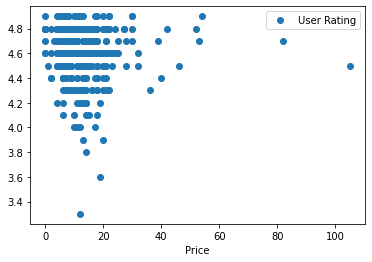

In [66]:
dedup_table.plot(x='Price', y='User Rating', style='o')


É possível observar que a maioria dos livros são avaliados com notas acima de 3.5.
Além disso, os livros acima de 20 dólares parecem ser sempre bem avaliados.

Como observamos anteriormente, existe uma variação grande na quantidade de avaliações por livros.

**Será que a quantidade de avaliações está relacionada com o preço?**

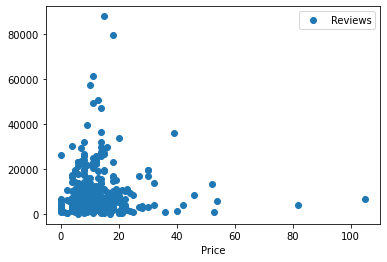

In [67]:
dedup_table.plot(x='Price', y='Reviews', style='o')

Podemos observar que livros com preço maior possuem um número absoluto de avaliações menor.

Ainda considerando essa questão da discrepância no número de avaliações,
**livros com um menor número de avaliações têm uma nota maior?**

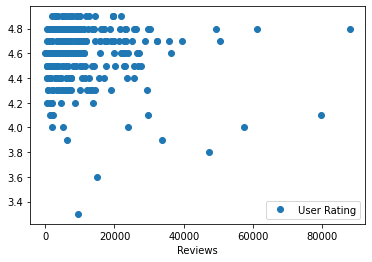

In [68]:
dedup_table.plot(x='Reviews', y='User Rating', style='o')

É difícil concluir algo apenas com esse gráfico, mas chama muito a atenção como alguns poucos livros têm mais do que 40 mil avaliações com notas acima de 4,5. 

Até então estavámos considerando as notas e o número de avaliações como números absolutos, mas se considerarmos as duas coisas em conjunto?

Primeiramente, vamos criar uma nova coluna chamada `'Scaled User Rating'` que receberá a nota dividida pelo número de avaliações.

In [75]:
dedup_table.loc[:, 'Scaled User Rating'] = dedup_table['User Rating'] / dedup_table['Reviews']

`pandas` permite a utilização de operadores aritméticos (+ - * / % //) diretamente entre as colunas.

As operações são realizadas entre as linhas correspondentes das colunas.

Agora vamos criar um gráfico considerando a nota padronizada:

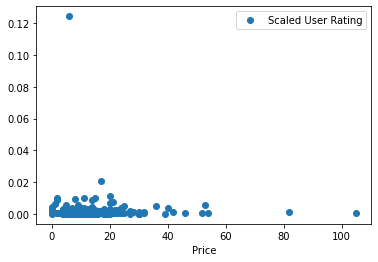

In [77]:
dedup_table.plot(x='Price', y='Scaled User Rating', style='o')

A partir desse gráfico, podemos pensar que o número total de avaliações maior não impactou negativamente na nota dos livros. Se eu fosse escolher um livro para ler, consideraria os livros que estão com um número de avaliações maior que 40 mil, porque os livros foram avaliados mais vezes e continuam bem classificados. Claro que existem vieses nesse sentido, inclusive o viés de as pessoas sentirem vontade de avaliar o livro. Será que isso tem relação com o ano que o livro se tornou um *bestselling*?

**Qual o número total de avaliações considerando o ano dos *bestsellers*?**

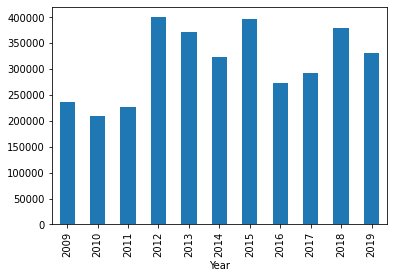

In [78]:
dedup_table.groupby('Year')['Reviews'].sum().plot.bar()

É possível observar que para os primeiros anos o número total de avaliações é realmente menor e isso pode ter relação com vários fatores, como a amostragem e também a difusão do serviço de livros da Amazon em si. Em 2016 e 2017 há uma leve queda, será que tem relação com a remoção das duplicações?

**Vamos verificar a distribuição criando o mesmo gráfico, mas agora com a tabela sem remover duplicações!**

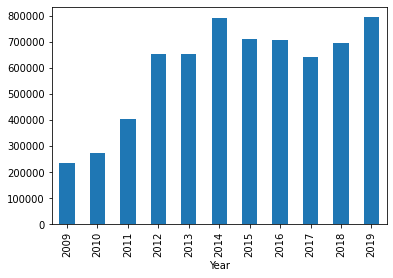

In [79]:
table.groupby('Year')['Reviews'].sum().plot.bar()

Interessante! Parece que alguns livros voltaram para a lista de bestsellers em 2016 e 2017? 

Existem várias coisas legais que poderíamos verificar ainda! Os livros ficaram mais caros com os anos? Qual autor(a) tem mais livros como *bestsellers*?



---



Para finalizar, uma coisa bem comum que precismamos fazer muitas vezes é selecionar linhas de interesse com base em valores de colunas. 

**Por exemplo, uma seleção dos bestsellers de 2012:**

In [81]:
table[table['Year'] == 2012].head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
30,Barefoot Contessa Foolproof: Recipes You Can T...,Ina Garten,4.8,1296,24,2012,Non Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
94,Eat to Live: The Amazing Nutrient-Rich Program...,Joel Fuhrman MD,4.5,6346,9,2012,Non Fiction
104,Fifty Shades Darker,E L James,4.4,23631,7,2012,Fiction
105,Fifty Shades Freed: Book Three of the Fifty Sh...,E L James,4.5,20262,11,2012,Fiction


As seleções acontecem como base em booleanos (True ou False) associados com cada linha ao fazermos a comparação `table['Year'] == 2012`:

In [82]:
(table['Year'] == 2012).head()

0    False
1    False
2    False
3    False
4    False
Name: Year, dtype: bool

Com base nessa Serie resultante da comparação, cada linha é mantida ou removida do resultado na hora de selecionar com `table[lista de booleanos]`, onde a lista (ou Serie) de booleanos é gerada no momento da comparação (bloco de código anterior).